# Matrix Multiplication from Scratch

In [2]:
from pathlib import Path
import pickle, gzip, math, os, time, matplotlib as mpl, matplotlib.pyplot as plt

In [3]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [6]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [7]:
!ls -l data

total 16656
-rw-rw-r-- 1 thulasiram thulasiram 17051982 Apr 10 13:40 mnist.pkl.gz


In [8]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid,y_valid),_) = pickle.load(f, encoding='latin-1')

In [9]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [10]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [11]:
list(chunks(vals,5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

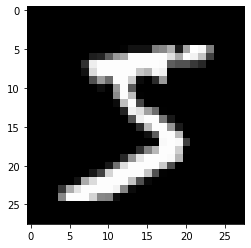

In [15]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1,28)))

In [16]:
from itertools import islice

In [18]:
it = iter(vals)
islice(it,5)

In [19]:
list(islice(it,5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [20]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [21]:
list(islice(it, 5))

[]

In [22]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)),[]))

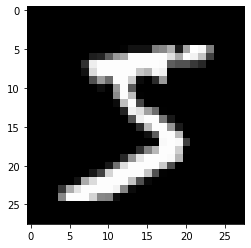

In [23]:
plt.imshow(img)

## Matrix and Tensor

In [30]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [31]:
m = Matrix(img)

In [32]:
m[20,15]

0.98828125

In [33]:
import torch
from torch import tensor

In [34]:
tensor([1,2,3])

tensor([1, 2, 3])

In [35]:
x_train, y_train, x_valid, y_valid = map(tensor,(x_train,y_train,x_valid,y_valid))

In [36]:
x_train.shape

torch.Size([50000, 784])

In [38]:
x_train.type()

'torch.FloatTensor'

## Tensor

In [40]:
imgs = x_train.reshape(-1,28,28); imgs.shape

torch.Size([50000, 28, 28])

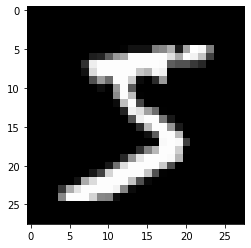

In [41]:
plt.imshow(imgs[0])

In [42]:
imgs[0,20,15]

tensor(0.9883)

In [43]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [45]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [47]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

### Matrix Multiplication 

In [49]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [50]:
x_valid.shape

torch.Size([10000, 784])

In [51]:
m1 = x_valid[:5]
m2 = weights

In [52]:
ar, ac = m1.shape
br, bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [53]:
t1 = torch.zeros(ar,bc)

In [54]:
for i in range(ar):   #5
    for j in range(bc): #10
        for k in range(ac): #784
            t1[i,j] += m1[i,k] * m2[k,j]

In [55]:
t1.shape

torch.Size([5, 10])

In [57]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [58]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [59]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [60]:
%time _=matmul(m1,m2)

CPU times: user 411 ms, sys: 294 µs, total: 412 ms
Wall time: 411 ms


In [61]:
ar*bc*ac

39200

In [62]:
## Numba

In [65]:
from numba import njit

In [66]:
@njit
def dot(a,b):
    res = 0
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [67]:
from numpy import array

In [68]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 194 ms, sys: 23.3 ms, total: 217 ms
Wall time: 264 ms


20.0

In [69]:

%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 33 µs, sys: 0 ns, total: 33 µs
Wall time: 35.8 µs


20.0

In [ ]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

In [70]:
m1a,m2a = m1.numpy(),m2.numpy()

In [71]:
from fastcore.test import *

In [72]:
test_close(t1,matmul(m1a,m2a))

In [73]:
%timeit -n 50 matmul(m1a,m2a)

353 ms ± 7 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [74]:
## Elementwise OPS

##### Forbenius norm
$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

In [78]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [79]:
sf = (m*m).sum()

In [80]:
sf.sqrt()

tensor(16.88)

In [83]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:]*b[:,j]).sum()
    return c

In [84]:
test_close(t1,matmul(m1,m2))

In [85]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:], b[:,j])
    return c     

In [86]:
test_close(t1,matmul(m1, m2))

### Broadcasting

In [90]:
 a = tensor([10.,6.,-4.])

In [91]:
a > 0

tensor([ True,  True, False])

In [92]:
c = tensor([10,20,30]);c

tensor([10, 20, 30])

In [97]:
m = tensor(np.arange(1,10).reshape(3,3))

In [98]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [99]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [100]:
m + c

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [101]:
c+m

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [102]:
t = c.expand_as(m)

In [103]:
t

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [104]:
m + t

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [105]:
t.storage()

 10
 20
 30
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [106]:

c.unsqueeze(0), c[None, :]

(tensor([[10, 20, 30]]), tensor([[10, 20, 30]]))

In [107]:
c

tensor([10, 20, 30])

In [108]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [109]:
c.unsqueeze(1), c[:, None]

(tensor([[10],
         [20],
         [30]]),
 tensor([[10],
         [20],
         [30]]))

In [110]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

In [111]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [112]:
c[:,None].expand_as(m)

tensor([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])

In [113]:
m + c[:,None]

tensor([[11, 12, 13],
        [24, 25, 26],
        [37, 38, 39]])

In [114]:
m + c[None,:]

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [115]:
c[None,:] * c[:,None]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

## Matmul with broadcasting

In [117]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [118]:
digit[:,None].shape

torch.Size([784, 1])

In [119]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [120]:
m2

tensor([[-1.53, -0.75, -0.65,  ..., -1.61, -0.71,  0.30],
        [-0.78, -0.25, -0.22,  ..., -1.16,  0.70,  0.20],
        [ 0.87,  0.24, -0.66,  ..., -1.45,  0.06, -0.62],
        ...,
        [ 0.51,  0.47, -0.26,  ...,  0.65,  0.43, -1.29],
        [ 0.52,  1.03,  0.81,  ..., -0.10,  2.26, -0.28],
        [-1.49,  0.39, -0.55,  ..., -0.19, -0.51,  0.54]])

In [121]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [128]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        c[i] = (a[i,:,None]*b).sum(dim=0)
    return c

In [129]:
test_close(t1,matmul(m1, m2))

In [130]:
tr = matmul(x_train,weights)

In [131]:
tr.shape

torch.Size([50000, 10])

In [132]:
%time _=matmul(x_train, weights)

CPU times: user 1.98 s, sys: 11.8 ms, total: 1.99 s
Wall time: 681 ms
